<a href="https://colab.research.google.com/github/thenikto/mag_ml/blob/main/ml_mag_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Insurance Data**

**Компания поделилась данными о своем годовом страховании автомобиля. Теперь вам нужно узнать о реальном поведении клиентов по этим данным.**


**1. Загружаем данные**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
url = "/content/sample_data/Car_Insurance_Claim.csv"
data = pd.read_csv(url)

In [3]:
data.shape

(10000, 19)

В таблице содержатся данные о 10000 клиентах, число признаков-17.

In [4]:
data

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


Метод data_raw.head() отображает первые строки (по умолчанию, 5 строк) таблицы


In [5]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


А вот последние строки.

In [6]:
data.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

**Анализ данных.**

Мы видим, что столбцы (признаки) имеют имена

` ID` -  идентификатор водителя (числовой)

` AGE` - возраст клиента (категориальный)

`GENDER` - пол клиента (категориальный)


`RACE` - раса (категориальный)

`DRIVING_EXPERIENCE` - стаж вождения клиента (категориальный)

`EDUCATION` - образование (категориальный)

`INCOME` - уровень дохода (категориальный)

`CREDIT_SCORE`	 - кредитный рейтинг(числовой)

`VEHICLE_OWNERSHIP` - владение транспортным средством (числовой)

`VEHICLE_YEAR` - год выпуска транспортного средства(категориальный)

`MARRIED`- семейное положение (числовой)

`CHILDREN` - наличие детей (числовой)

`POSTAL_CODE` - почтовый индекс (числовой)

`ANNUAL_MILEAGE` - пробег автомобиля (числовой)

`VEHICLE_TYPE` - тип транспортного средства (категориальный)

`SPEEDING_VIOLATIONS` - штрафы за превышение скорости (числовой)

`DUIS` - вождение в нетрезвом виде (числовой)

`PAST_ACCIDENTS`- аварии (числовой)

`OUTCOME` - подал ли клиент страховой иск в течение года (числовой)

Столбец outcome означает , обратился ли клиент в страховую компанию с требованием возмещения убытков или покрытия расходов, связанных с каким-либо страховым случаем. Если значение в столбце равно 1, клиент  подал иск, а 0 означает, что клиент не обращался с таким требованием.


Эти данные подходят для задачи классификации. Требуется предсказать OUTCOME по остальным признакам.

Столбцы 'AGE' , 'GENDER' , 'RACE' , 'DRIVING_EXPERIENCE' , 'EDUCATION' , 'INCOME' , 'VENICLE_YEAR' , 'VENICLE_TYPE' содержат категориальные значения. Пока они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [8]:
data_1 = data.copy()
data['AGE'] = data['AGE'].astype('category')
data['GENDER'] = data['GENDER'].astype('category')
data['RACE'] = data['RACE'].astype('category')
data['DRIVING_EXPERIENCE'] = data['DRIVING_EXPERIENCE'].astype('category')
data['EDUCATION'] = data['EDUCATION'].astype('category')
data['INCOME'] = data['INCOME'].astype('category')
data['VEHICLE_YEAR'] = data['VEHICLE_YEAR'].astype('category')
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].astype('category')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10000 non-null  int64   
 1   AGE                  10000 non-null  category
 2   GENDER               10000 non-null  category
 3   RACE                 10000 non-null  category
 4   DRIVING_EXPERIENCE   10000 non-null  category
 5   EDUCATION            10000 non-null  category
 6   INCOME               10000 non-null  category
 7   CREDIT_SCORE         9018 non-null   float64 
 8   VEHICLE_OWNERSHIP    10000 non-null  float64 
 9   VEHICLE_YEAR         10000 non-null  category
 10  MARRIED              10000 non-null  float64 
 11  CHILDREN             10000 non-null  float64 
 12  POSTAL_CODE          10000 non-null  int64   
 13  ANNUAL_MILEAGE       9043 non-null   float64 
 14  VEHICLE_TYPE         10000 non-null  category
 15  SPEEDING_VIOLATIONS 

Информация о числовых признаках:

In [10]:
data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей. По умолчанию этот метод дает информацию только о количественных признаках.

Информация о категориальных признаках:

In [11]:
data.describe(include=['category'])

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


Самая популярная возрастная группа — 26-39 лет.
Большая часть участников относится к "majority" по признаку RACE.
Самый распространенный уровень образования — "high school", а класс дохода — "upper class".
Многие водят автомобили, выпущенные до 2015 года, причем большинство автомобилей — седаны. Число мужчин и женщин, обратившихся за страховкой примерно одинаковое.


**Заполнение пропущенных значений.**

Пропущенные значения:

In [12]:
data.isnull().sum()

,0
ID,0
AGE,0
GENDER,0
RACE,0
DRIVING_EXPERIENCE,0
EDUCATION,0
INCOME,0
CREDIT_SCORE,982
VEHICLE_OWNERSHIP,0
VEHICLE_YEAR,0


In [13]:
[feature for feature in data.columns if data[feature].isnull().sum() > 1]

['CREDIT_SCORE', 'ANNUAL_MILEAGE']

Заполнение пропущенных значений медианой для выбранных столбцов 'CREDIT_SCORE' и 'ANNUAL_MILEAGE

In [14]:
columns_to_fill = ['CREDIT_SCORE', 'ANNUAL_MILEAGE']

for column in columns_to_fill:
    median_value = data[column].median()
    data[column] = data[column].fillna(median_value)

In [15]:
data.isnull().sum()

,0
ID,0
AGE,0
GENDER,0
RACE,0
DRIVING_EXPERIENCE,0
EDUCATION,0
INCOME,0
CREDIT_SCORE,0
VEHICLE_OWNERSHIP,0
VEHICLE_YEAR,0


**Матрица корреляции.**

In [16]:
corr_mat = data.select_dtypes(include=[float, int]).corr()

In [17]:
corr_mat

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001416,0.009197,0.014826,0.001233,0.006038,-0.002085,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001416,1.000000,0.295310,0.266744,0.209448,0.008759,-0.157839,0.194658,0.120966,0.172008,-0.308998
VEHICLE_OWNERSHIP,0.009197,0.295310,1.000000,0.175626,0.125990,-0.004866,-0.092527,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.266744,0.175626,1.000000,0.287009,0.012045,-0.439227,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.209448,0.125990,0.287009,1.000000,0.020911,-0.425509,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.008759,-0.004866,0.012045,0.020911,1.000000,-0.126802,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002085,-0.157839,-0.092527,-0.439227,-0.425509,-0.126802,1.000000,-0.308303,-0.111454,-0.187678,0.178041
SPEEDING_VIOLATIONS,0.008156,0.194658,0.133868,0.218855,0.220415,0.113686,-0.308303,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.120966,0.086567,0.120840,0.115354,0.038492,-0.111454,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.172008,0.119521,0.215269,0.206295,-0.116985,-0.187678,0.443074,0.259359,1.000000,-0.311495


<Axes: >

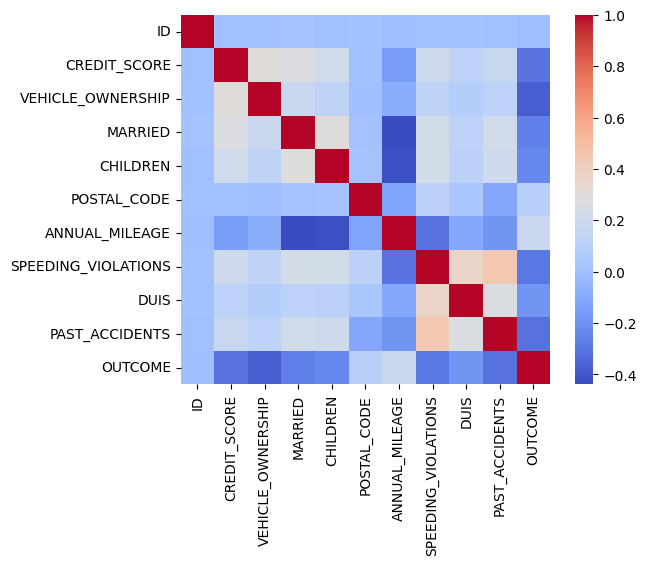

In [18]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')


<Axes: >

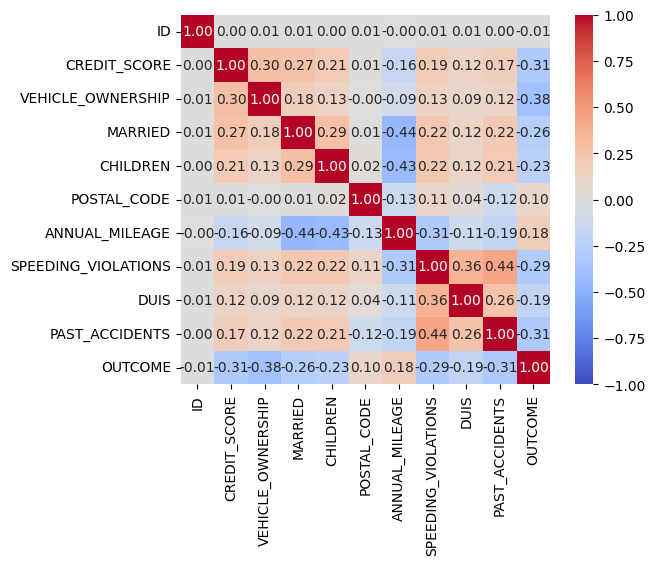

In [19]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')


 Корреляция 0.44 между признаками SPEEDING_VIOLATIONS и PAST_ACCIDENTS может указывать на то, что водители с большим количеством превышений скорости имеют больше аварий. Также корреляция 0.36 между DUIS и SPEEDING_VIOLATIONS говорит о связи езды в нетрезвом виде и количестве аварий. Корреляция 0.26 между PAST_ACCIDENTS и DUIS говорит о том, что водители употребляющие перед поездками за рулем имеют больше аварий.
 Связь 0.295 между кредитным рейтингом CREDIT_SCORE и владением автомобилем VEHICLE_OWNERSHIP может указывать на то, что люди с более высоким кредитным рейтингом более склонны иметь автомобиль, возможно, из-за лучших финансовых условий.



In [20]:
!pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.2 MB/s eta 0:00:00


In [21]:
from phik.report import plot_correlation_matrix
from phik import report

interval columns not set, guessing: ['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']


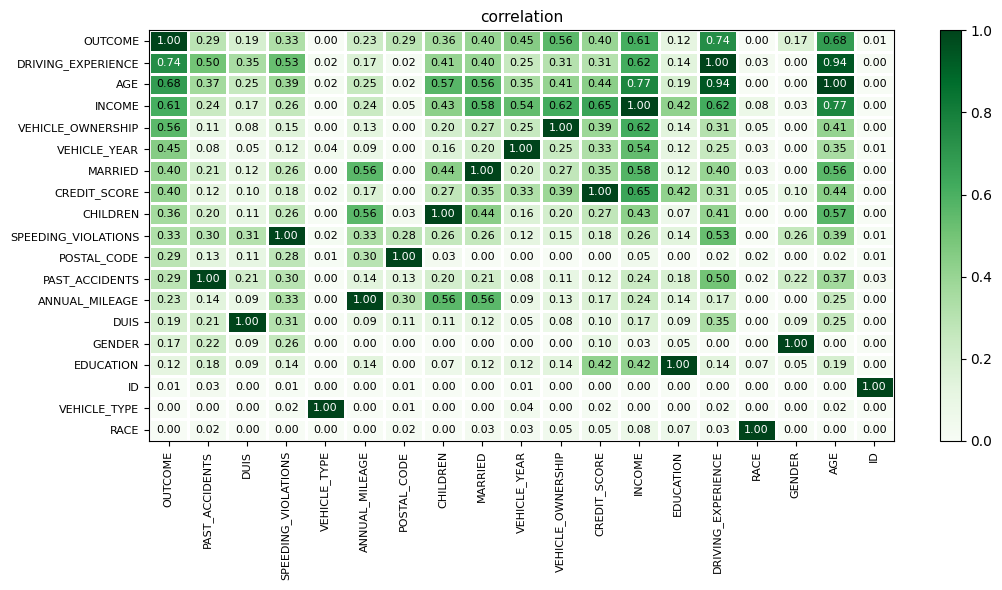

In [22]:
phik_overview = data.phik_matrix().round(2).sort_values('OUTCOME')

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",


                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

Значение корреляции 0.74 OUTCOME и DRIVING_EXPERIENCE указывает на довольно высокую зависимость между опытом вождения и необходимостью выплат.
AGE имеет корреляцию высокую корреляцию (0.68) с OUTCOME, что также свидетельствует о высокой зависимости.

Выведем коэффициенты корреляции, большие заданного значения:

In [23]:
corr_mat >= 0.3

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,True,False,False,False,False,False,False,False,False,False,False
CREDIT_SCORE,False,True,False,False,False,False,False,False,False,False,False
VEHICLE_OWNERSHIP,False,False,True,False,False,False,False,False,False,False,False
MARRIED,False,False,False,True,False,False,False,False,False,False,False
CHILDREN,False,False,False,False,True,False,False,False,False,False,False
POSTAL_CODE,False,False,False,False,False,True,False,False,False,False,False
ANNUAL_MILEAGE,False,False,False,False,False,False,True,False,False,False,False
SPEEDING_VIOLATIONS,False,False,False,False,False,False,False,True,True,True,False
DUIS,False,False,False,False,False,False,False,True,True,False,False
PAST_ACCIDENTS,False,False,False,False,False,False,False,True,False,True,False


In [24]:
corr_mat.where(np.triu(corr_mat >= 0.25, k=1)).stack().sort_values(ascending=False)

SPEEDING_VIOLATIONS  PAST_ACCIDENTS       0.443074
                     DUIS                 0.359838
CREDIT_SCORE         VEHICLE_OWNERSHIP    0.295310
MARRIED              CHILDREN             0.287009
CREDIT_SCORE         MARRIED              0.266744
DUIS                 PAST_ACCIDENTS       0.259359
dtype: float64

In [25]:
corr_mat <= 0.3

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,False,True,True,True,True,True,True,True,True,True,True
CREDIT_SCORE,True,False,True,True,True,True,True,True,True,True,True
VEHICLE_OWNERSHIP,True,True,False,True,True,True,True,True,True,True,True
MARRIED,True,True,True,False,True,True,True,True,True,True,True
CHILDREN,True,True,True,True,False,True,True,True,True,True,True
POSTAL_CODE,True,True,True,True,True,False,True,True,True,True,True
ANNUAL_MILEAGE,True,True,True,True,True,True,False,True,True,True,True
SPEEDING_VIOLATIONS,True,True,True,True,True,True,True,False,False,False,True
DUIS,True,True,True,True,True,True,True,False,False,True,True
PAST_ACCIDENTS,True,True,True,True,True,True,True,False,True,False,True


In [26]:
corr_mat.where(np.triu(corr_mat <= -0.25, k=1)).stack().sort_values(ascending=False)

,,0
MARRIED,OUTCOME,-0.262104
SPEEDING_VIOLATIONS,OUTCOME,-0.291862
ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,-0.308303
CREDIT_SCORE,OUTCOME,-0.308998
PAST_ACCIDENTS,OUTCOME,-0.311495
VEHICLE_OWNERSHIP,OUTCOME,-0.378921
CHILDREN,ANNUAL_MILEAGE,-0.425509
MARRIED,ANNUAL_MILEAGE,-0.439227


 Также обнаружена сильная отрицательная корреляция между CHILDREN и ANNUAL_MILEAGE: -0.44. Т.е у семей с детьми годовой пробег меньше. У признаков MARRIED и ANNUAL_MILEAGE отрицательная корреляци : -0.44. Замужние люди могут ездить меньше, возможно, из-за того, что они реже путешествуют без детей или имеют менее активный образ жизни.

**Построим диаграммы рассеивания.**

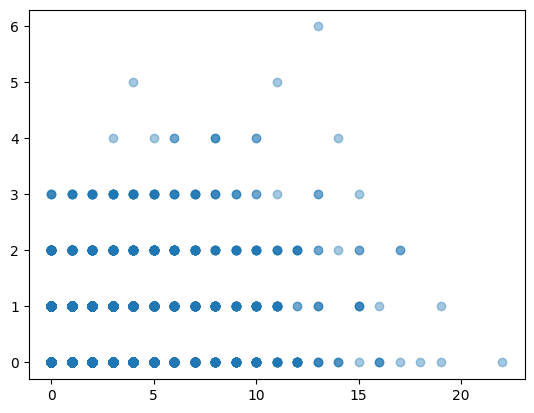

In [27]:
plt.scatter(data['SPEEDING_VIOLATIONS'], data['DUIS'], alpha=0.4)

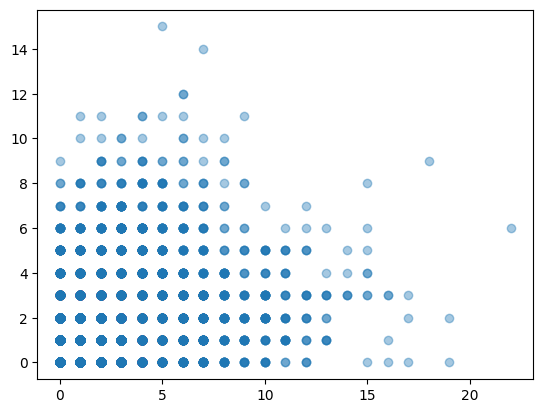

In [28]:
plt.scatter(data['SPEEDING_VIOLATIONS'], data['PAST_ACCIDENTS'], alpha=0.4)

**Построим гистoграммы.**

Посмотрим, являются ли классы сбалансированными

In [29]:
class_counts = data['OUTCOME'].value_counts()
print("Количество классов:")
print(class_counts)


Количество классов:
OUTCOME
0.0    6867
1.0    3133
Name: count, dtype: int64


Визуализация распределения классов

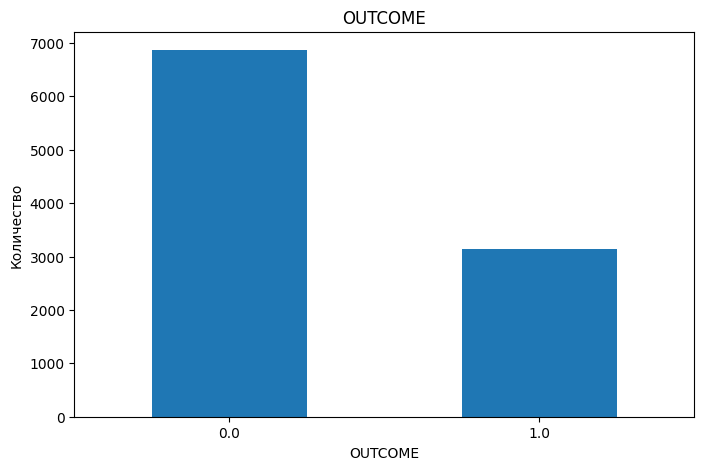

In [30]:
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar')
plt.title('OUTCOME')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

Наши классы не являются сбалансированными.

<Axes: xlabel='AGE', ylabel='count'>

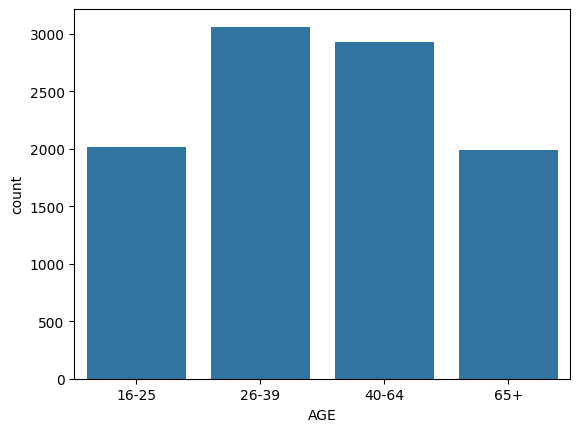

In [31]:
sns.countplot(x='AGE', data=data)

Замечаем, что больше всего  людей в возрасте 26-39 и 40-64 лет

<Axes: xlabel='GENDER', ylabel='count'>

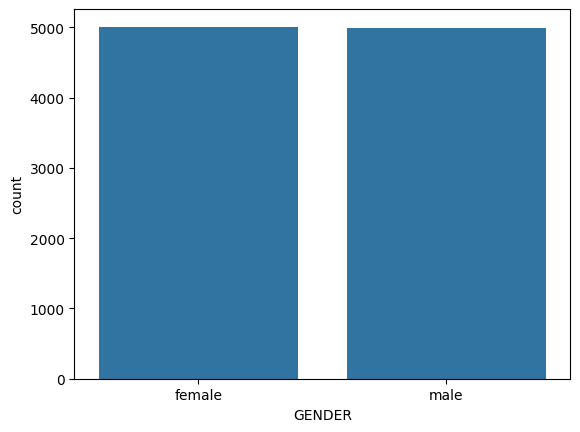

In [32]:
sns.countplot(x='GENDER', data=data)

число женщин и мужчин почти одинаково

<Axes: xlabel='DRIVING_EXPERIENCE', ylabel='count'>

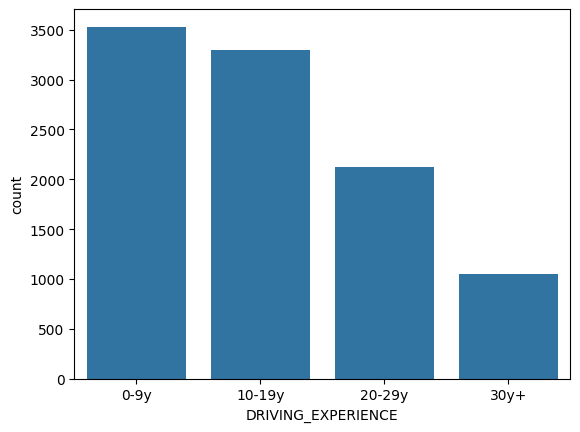

In [33]:
sns.countplot(x='DRIVING_EXPERIENCE', data=data)

Больше всего водителей со стажем 0-9 лет.Затем со стажем 10-19 лет.



<Axes: xlabel='AGE', ylabel='count'>

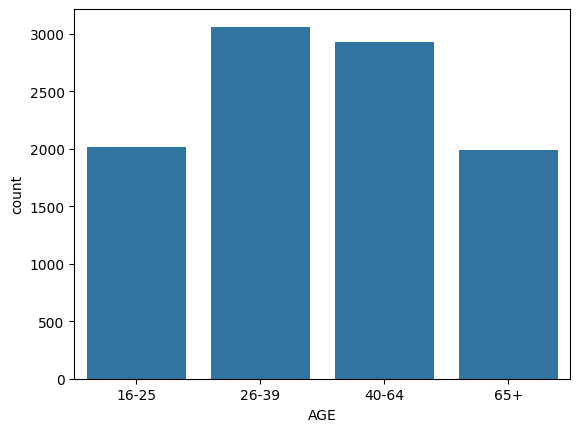

In [34]:
sns.countplot(x='AGE', data=data)

Видим, что больше всего людей возраста 26-39 лет и 40-64 года.


<Axes: xlabel='DRIVING_EXPERIENCE', ylabel='OUTCOME'>

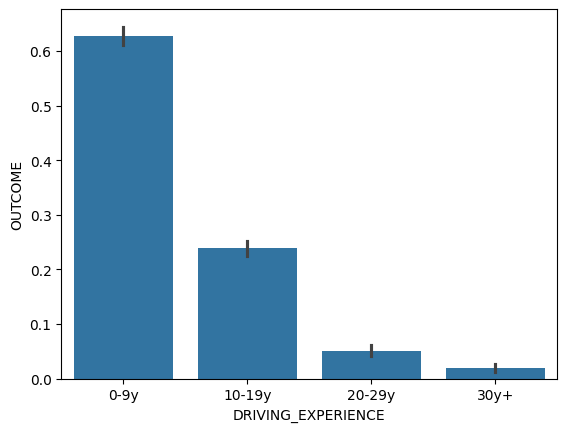

In [35]:
sns.barplot(data=data, x="DRIVING_EXPERIENCE", y="OUTCOME")

Больше всего обращений страховая компания получает от людей со стажем 0-9 лет.

<Axes: xlabel='CHILDREN', ylabel='count'>

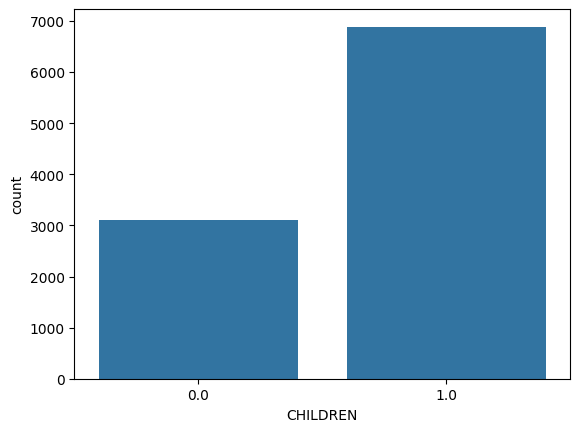

In [36]:
sns.countplot(x='CHILDREN', data=data)

Больше всего людей, у которых есть дети.

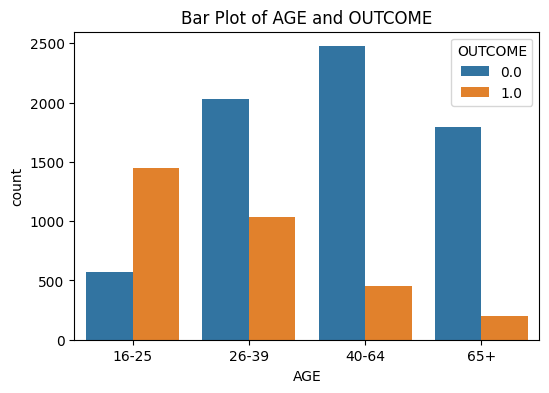

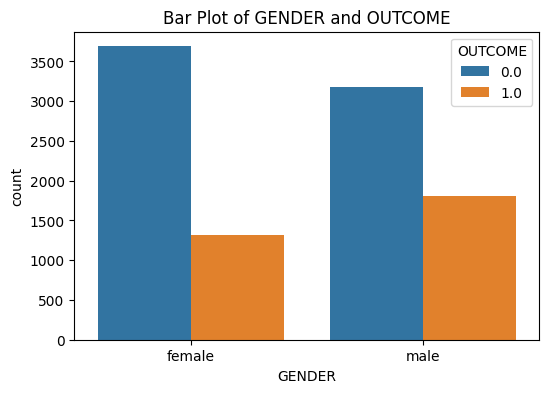

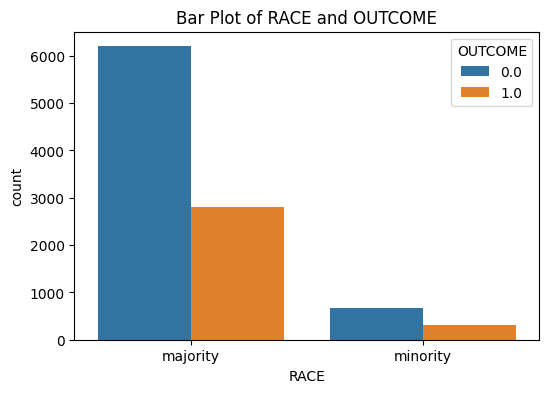

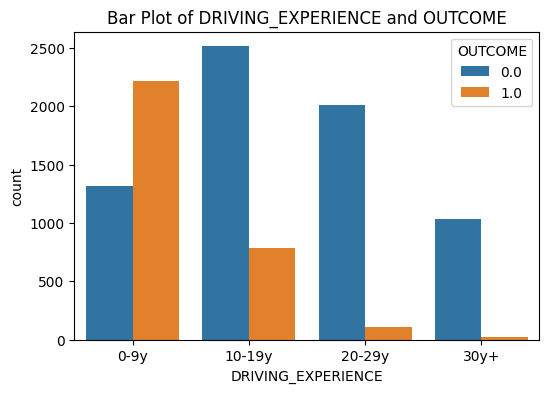

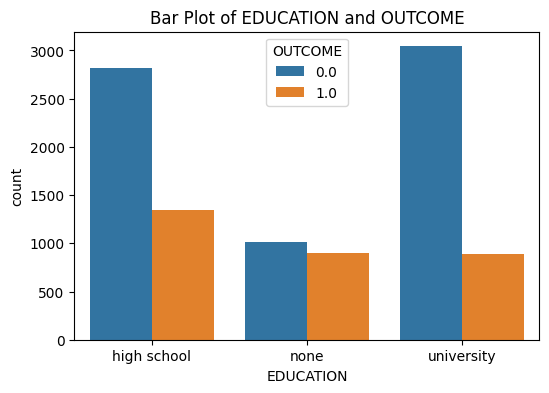

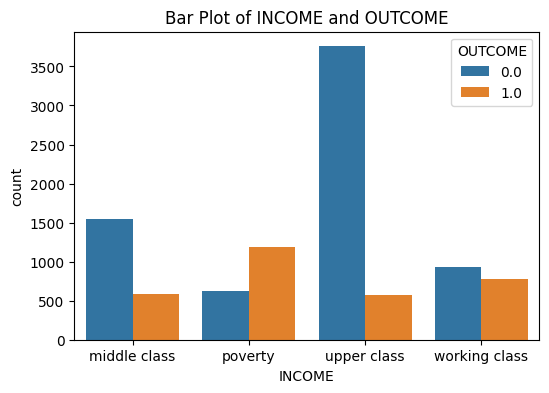

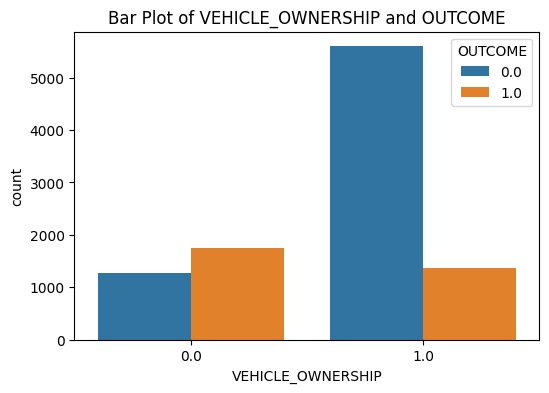

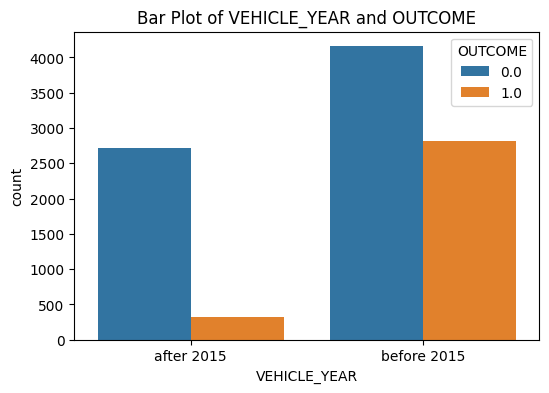

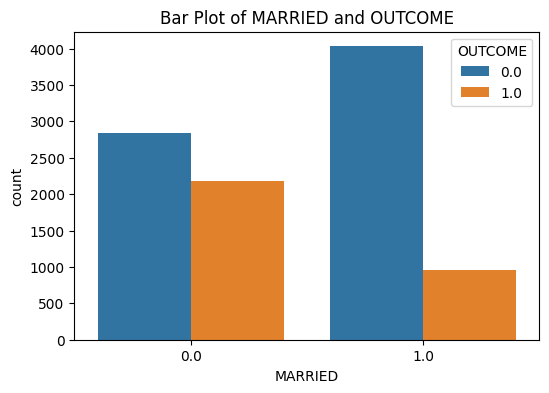

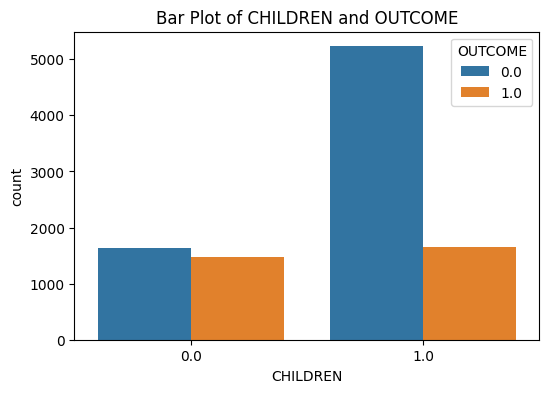

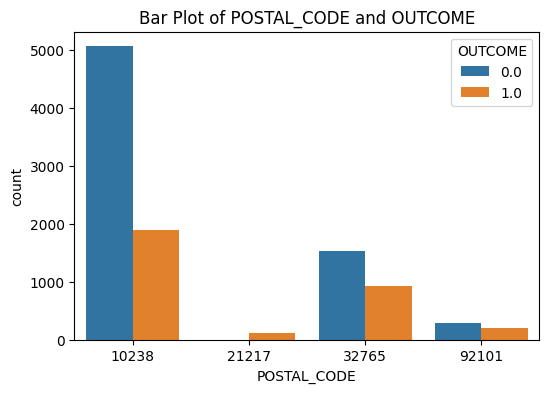

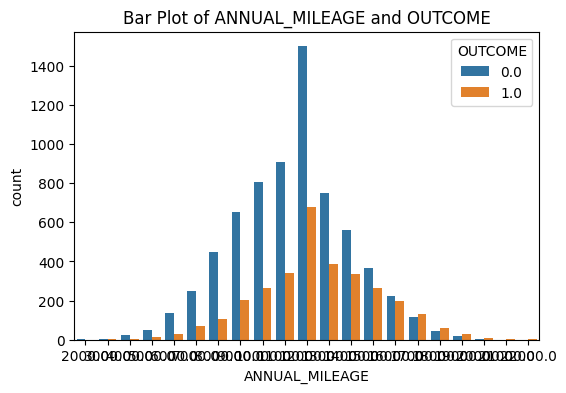

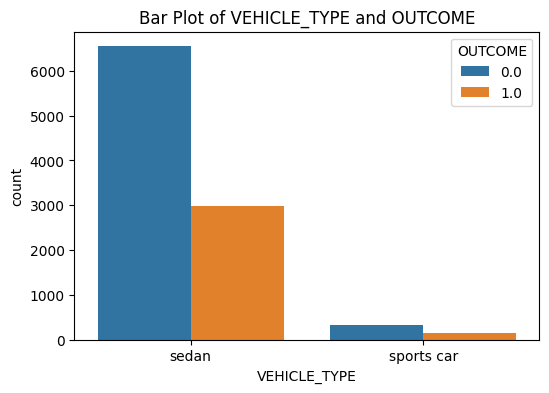

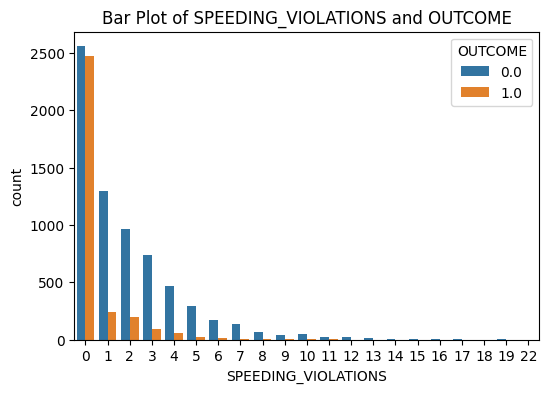

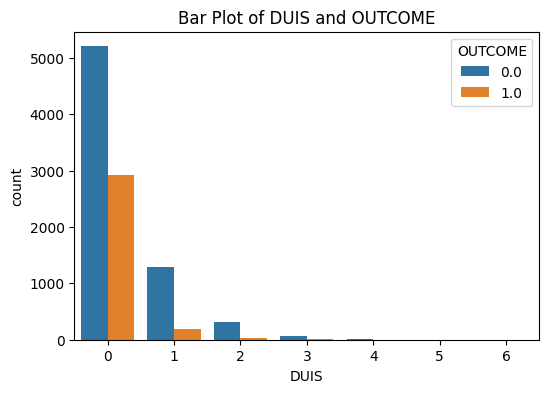

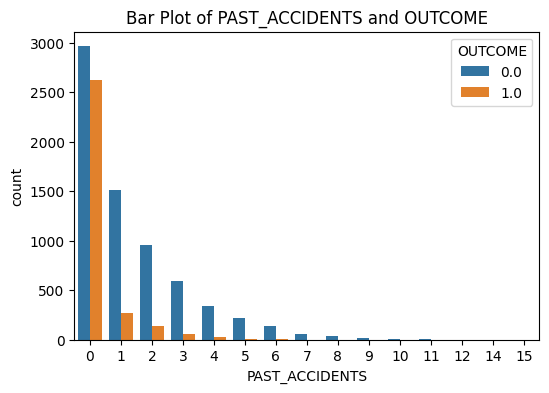

In [37]:
for feature in ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
                'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE',
                'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='OUTCOME', data=data)
    plt.title(f'Bar Plot of {feature} and OUTCOME')
    plt.show()


**Обработка категориальных признаков**

Категориальные признаки надо закодировать с помощью числовых принаков.

Функция pd.get_dummies делает One-Hot Encoding для признаков AGE, DRIVING_EXPERIENCE, EDUCATION и INCOME.

In [38]:
AGE_dummies = pd.get_dummies(data['AGE'])
DRIVING_EXPERIENCE_dummies = pd.get_dummies(data['DRIVING_EXPERIENCE'])
EDUCATION_dummies = pd.get_dummies(data['EDUCATION'])
INCOME_dummies = pd.get_dummies(data['INCOME'])

In [39]:
data['GENDER'] = pd.factorize(data['GENDER'])[0]
data['RACE'] = pd.factorize(data['RACE'])[0]
data['VEHICLE_YEAR'] = pd.factorize(data['VEHICLE_YEAR'])[0]
data['VEHICLE_TYPE'] = pd.factorize(data['VEHICLE_TYPE'])[0]

In [40]:

new_data = pd.concat([data.drop(columns=['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME']),
                      AGE_dummies, DRIVING_EXPERIENCE_dummies, EDUCATION_dummies, INCOME_dummies], axis=1)

In [41]:
new_data.head()

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,10-19y,20-29y,30y+,high school,none,university,middle class,poverty,upper class,working class
0,569520,0,0,0.629027,1.0,0,0.0,1.0,10238,12000.0,...,False,False,False,True,False,False,False,False,True,False
1,750365,1,0,0.357757,0.0,1,0.0,0.0,10238,16000.0,...,False,False,False,False,True,False,False,True,False,False
2,199901,0,0,0.493146,1.0,1,0.0,0.0,10238,11000.0,...,False,False,False,True,False,False,False,False,False,True
3,478866,1,0,0.206013,1.0,1,0.0,1.0,32765,11000.0,...,False,False,False,False,False,True,False,False,False,True
4,731664,1,0,0.388366,1.0,1,0.0,0.0,32765,12000.0,...,True,False,False,False,True,False,False,False,False,True


In [42]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   GENDER               10000 non-null  int64  
 2   RACE                 10000 non-null  int64  
 3   CREDIT_SCORE         10000 non-null  float64
 4   VEHICLE_OWNERSHIP    10000 non-null  float64
 5   VEHICLE_YEAR         10000 non-null  int64  
 6   MARRIED              10000 non-null  float64
 7   CHILDREN             10000 non-null  float64
 8   POSTAL_CODE          10000 non-null  int64  
 9   ANNUAL_MILEAGE       10000 non-null  float64
 10  VEHICLE_TYPE         10000 non-null  int64  
 11  SPEEDING_VIOLATIONS  10000 non-null  int64  
 12  DUIS                 10000 non-null  int64  
 13  PAST_ACCIDENTS       10000 non-null  int64  
 14  OUTCOME              10000 non-null  float64
 15  16-25                10000 non-null  

**Нормализация признаков**

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Нормализируем данные по каждому столбцу, переводя все значения в диапазон от 0 до 1.

In [43]:
# Исключаем булевые столбцы и затем нормализуем данные
data_numeric = data.select_dtypes(include=['number'])
data_normal = (data_numeric - data_numeric.min(axis=0)) / (data_numeric.max(axis=0) - data_numeric.min(axis=0))
data_normal.describe()

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.500483,0.499000,0.098800,0.510612,0.697000,0.696700,0.498200,0.688800,0.117593,0.486300,0.047700,0.067405,0.039867,0.070420,0.313300
std,0.290067,0.500024,0.298408,0.144117,0.459578,0.459707,0.500022,0.463008,0.231064,0.134082,0.213141,0.101908,0.092498,0.110164,0.463858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249569,0.000000,0.000000,0.416714,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.501739,0.000000,0.000000,0.519774,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.753968,1.000000,0.000000,0.610769,1.000000,1.000000,1.000000,1.000000,0.275179,0.550000,0.000000,0.090909,0.000000,0.133333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
data_numeric_new = new_data.select_dtypes(include=['number'])
data_normal_new = (data_numeric - data_numeric.min(axis=0)) / (data_numeric.max(axis=0) - data_numeric.min(axis=0))
data_normal_new.describe()


,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.500483,0.499000,0.098800,0.510612,0.697000,0.696700,0.498200,0.688800,0.117593,0.486300,0.047700,0.067405,0.039867,0.070420,0.313300
std,0.290067,0.500024,0.298408,0.144117,0.459578,0.459707,0.500022,0.463008,0.231064,0.134082,0.213141,0.101908,0.092498,0.110164,0.463858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249569,0.000000,0.000000,0.416714,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.501739,0.000000,0.000000,0.519774,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.753968,1.000000,0.000000,0.610769,1.000000,1.000000,1.000000,1.000000,0.275179,0.550000,0.000000,0.090909,0.000000,0.133333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Выбор признаков**

Используем все признаки кроме ID, так как он создается только для идентификации человека

In [45]:
X = data_normal.drop (['ID', 'OUTCOME'], axis=1)
Y = data['OUTCOME']

In [46]:
X_new = data_normal_new.drop (['ID', 'OUTCOME'], axis=1)
Y_new = data['OUTCOME']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size = 0.25, random_state = 42)
N_train, _ = X_train.shape
N_test,  _ = X_test.shape
N_train, N_test

(7500, 2500)

**Метод ближайших соседей**

Попробуем обучить нашу модель с помощью метода kNN

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


Определяем диапазон значений для гиперпараметра k. Перебирем значения k от 1 до 30

In [49]:
param_grid = {'n_neighbors': range(1, 31)}

In [50]:
knn = KNeighborsClassifier()

С помощью GridSearchCV переберем значения k, используя 5-кратную кросс-валидацию

In [51]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)}, scoring='f1_weighted')

Находим оптимальное значение k и точность модели

In [52]:
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_


In [53]:
print(f"Лучшее значение k: {best_k}")
print(f"Точность на обучающей выборке с этим k: {best_score}")

Лучшее значение k: 29
Точность на обучающей выборке с этим k: 0.7894457945228446


Оценка модели на тестовой выборке

In [54]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, Y_train)
Y_pred = knn_best.predict(X_test)

In [55]:
f1 = f1_score(Y_test, Y_pred, average='binary')
print("F1 Score:", f1)

F1 Score: 0.6675603217158177


**Метод Random Forest**

In [56]:
from sklearn.ensemble import RandomForestClassifier


In [57]:
model = RandomForestClassifier()

Определяем гиперпараметры для подбора

In [58]:
param_grid = {
    'n_estimators': [50, 100,150, 200,250,300],
    'max_depth': [None, 10, 20, 30],
}

In [59]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='f1', verbose=2)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.4s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.4s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.4s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.4s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.8s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.8s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.6s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.6s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.6s
[CV] END ...................max_depth=None, n_estimators=150; total time=   0.9s
[CV] END ...................max_depth=None, n_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='f1', verbose=2)

Лучшие параметры

In [60]:
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'max_depth': 10, 'n_estimators': 300}


Используем лучшие параметры для обучения модели

In [61]:
best_model = grid_search.best_estimator_

In [62]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [63]:
from sklearn.metrics import f1_score

Вычисление F1:

In [64]:
f1 = f1_score(Y_test, y_test_pred, average='binary')
print("F1 Score:", f1)

F1 Score: 0.7107438016528925


**Логистическая Регрессия.**

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [66]:
log_reg = LogisticRegression(solver='liblinear')

In [67]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Коэффициент регуляризации
    'penalty': ['l1', 'l2'],              # Bыбор между L1 и L2 регуляризацией
}

In [68]:
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=2)

In [69]:
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'C': 1, 'penalty': 'l1'}


In [70]:
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test)

In [71]:

f1 = f1_score(Y_test, y_pred, average='binary')
print("F1 Score:", f1)

F1 Score: 0.691156462585034


**CatBoost**

In [72]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


In [73]:
from catboost import CatBoostClassifier

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
N_train, _ = X_train.shape
N_test,  _ = X_test.shape
N_train, N_test

(7500, 2500)

In [75]:
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 10]
}

In [76]:
grid_search = GridSearchCV(estimator=CatBoostClassifier(verbose=0),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=3)

In [77]:
grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7cf66b1a2920>,
             param_grid={'depth': [4, 6, 10], 'iterations': [500, 1000],
                         'learning_rate': [0.01, 0.1, 0.2]},
             scoring='f1')

In [78]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'depth': 6, 'iterations': 500, 'learning_rate': 0.01}


Получаем лучшие параметры из результата подбора гиперпараметров

In [79]:
best_params = grid_search.best_params_

In [80]:
model_optimized = CatBoostClassifier(
    iterations=best_params['iterations'],
    learning_rate=best_params['learning_rate'],
    depth=best_params['depth'],
    loss_function='Logloss',
    eval_metric='F1',
    verbose=100
)

Обучение модели с оптимальными гиперпараметрами

In [81]:
model_optimized.fit(X_train, Y_train, eval_set=(X_test, Y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6571217	test: 0.6382649	best: 0.6382649 (0)	total: 2.74ms	remaining: 1.37s
100:	learn: 0.7287683	test: 0.7042450	best: 0.7051460 (87)	total: 298ms	remaining: 1.18s
200:	learn: 0.7373354	test: 0.7208333	best: 0.7222222 (185)	total: 615ms	remaining: 915ms
300:	learn: 0.7425897	test: 0.7214927	best: 0.7223757 (294)	total: 984ms	remaining: 650ms
400:	learn: 0.7476677	test: 0.7232574	best: 0.7241379 (381)	total: 1.83s	remaining: 453ms
499:	learn: 0.7501106	test: 0.7231405	best: 0.7245179 (474)	total: 2.96s	remaining: 0us

bestTest = 0.7245179063
bestIteration = 474

Shrink model to first 475 iterations.


In [82]:
y_pred_optimized = model_optimized.predict(X_test)

In [83]:
f1 = f1_score(Y_test, y_pred_optimized, average='binary')
print("F1 Score:", f1)

F1 Score: 0.7245179063360881


**Попробуем побороться с несбалансированностью классов**

In [84]:
from collections import Counter

In [85]:
print('Число объектов до SMOTE:', Counter(Y))

Число объектов до SMOTE: Counter({0.0: 6867, 1.0: 3133})


Попробуем сделать это с помощью синтетического генерирования данных (SMOTE)

In [86]:

!pip install imbalanced-learn

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
knn = KNeighborsClassifier()

In [89]:
smote = SMOTE(
    sampling_strategy='auto',  # 'auto' означает увеличение меньшего класса до размера большего
    random_state=None,
    k_neighbors=3,             # Количество ближайших соседей для создания синтетических примеров.
    n_jobs=1
)

In [90]:
X_resampled, y_resampled = smote.fit_resample(X, Y)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [91]:
print('Количество объектов после SMOTE:', Counter(y_resampled))

Количество объектов после SMOTE: Counter({0.0: 6867, 1.0: 6867})


Попробуем еще раз обучить Catboost на новых данных.

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)


param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 10]
}


grid_search = GridSearchCV(
    estimator=CatBoostClassifier(verbose=0, random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=3
)

Найдем лучшие гиперпараметры

In [93]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

Лучшие параметры: {'depth': 4, 'iterations': 500, 'learning_rate': 0.1}


Обучаем CatBoostClassifier с лучшими гиперпараметрами

In [94]:
best_catboost = CatBoostClassifier(**best_params, verbose=0, random_state=42)
best_catboost.fit(X_train, y_train)

Оцениваем f1 на тестовых данных

In [95]:
y_pred = best_catboost.predict(X_test)
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score:: {f1}")

F1 Score:: 0.8763471355643789


Посмотрим на важность различных признаков для модели:

In [96]:
feature_importances = best_catboost.get_feature_importance()
feature_names = best_catboost.feature_names_

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                Feature  Importance
8        ANNUAL_MILEAGE   29.665085
10  SPEEDING_VIOLATIONS   15.637023
7           POSTAL_CODE   15.464257
12       PAST_ACCIDENTS   13.332505
3     VEHICLE_OWNERSHIP    6.224073
4          VEHICLE_YEAR    5.748725
2          CREDIT_SCORE    5.636204
0                GENDER    3.367012
11                 DUIS    2.276148
5               MARRIED    1.283649
6              CHILDREN    0.644956
9          VEHICLE_TYPE    0.432882
1                  RACE    0.287480


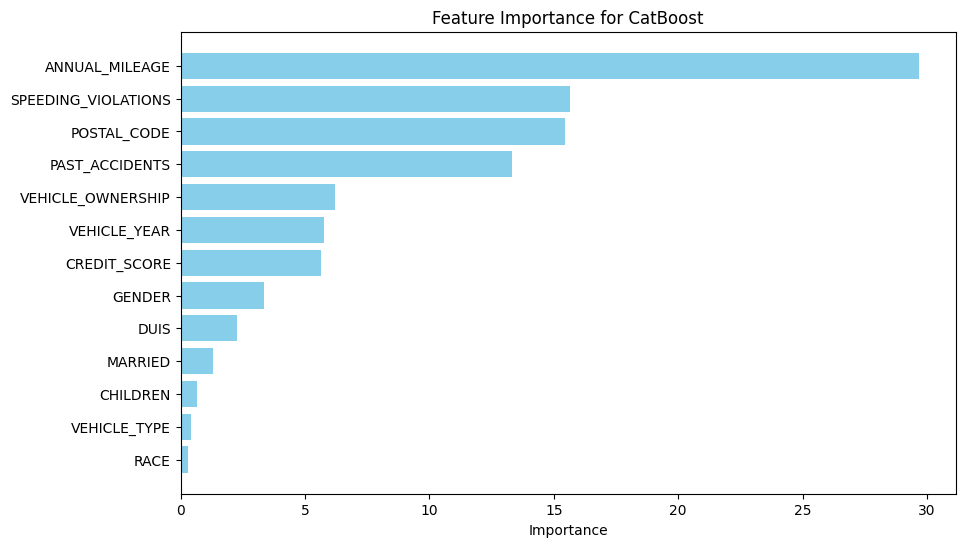

In [97]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for CatBoost')
plt.gca().invert_yaxis()  # Инвертировать ось для отображения важных признаков сверху
plt.show()

ANNUAL_MILEAGE - наиболее важный признак. Как видимо, чем выше пробег автомобиля, тем выше вероятность обращения в страховую.

POSTAL_CODE - возможно, расположение влияет на уровень преступности или климатические условия.

SPEEDING_VIOLATIONS  и PAST_ACCIDENTS - следующие по убыванию признаки.

**Используем XGBClassifier на сгенерированных данных**

In [98]:
from xgboost import XGBClassifier

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

Определяем сетку гиперпараметров для XGBoost

In [100]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

Используем F1-меру в качестве метрики для подбора параметров

In [101]:

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=3
)

Обучаем модель

In [102]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:27:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:27:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:27:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:27:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:27:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='f1')

Извлекаем лучшие гиперпараметры

In [103]:
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

Лучшие параметры: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


Обучаем XGBClassifier с лучшими гиперпараметрами

In [104]:
best_xgb = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:30:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

 F1 на тестовых данных:

In [105]:
y_pred = best_xgb.predict(X_test)
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1 Score: {f1}")


F1 Score: 0.8751753155680224



Получаем, что лучшее значение F1 имеет Catboost, если при этом сбалансировать классы. Без использования SMOTE модель, видимо, переобучается, тк классы не являются сбалансированными, и выдает более плохой результат. Catboost удобен в использовании и часто показывает лучшую производительность на данных с большим количеством категориальных переменных.
Второй по величине результат выдает XGBoost.
